<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  ~~**5:00PM, Friday, April 3rd**~~ **4:00PM, Monday, April 20th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems


## Submission

You need to submit the following items:
- The notebook `Assignment-1-uXXXXXXX.ipynb` (where uXXXXXXX is your uid) 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. You will also need to add your details below. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.
* Comment your code.
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

### Enter your Student ID below:

******
## Introduction

In the ever-evolving world of technology, security is everything. To the general consumer, security of a device can be a trivial point as they might have "Nothing to Hide". This argument alone is [considered flawed](https://thenextweb.com/contributors/2018/11/20/read-this-if-youve-got-nothing-to-hide/), although we are not here to argue this point. For the purposes of this assignment, we are focused on how device security is important for protecting information. This may have many use cases, such as protecting a [businesses trade secrets](https://www.nbcnews.com/news/china/china-s-hackers-are-stealing-secrets-u-s-firms-again-n917836) or a [government's records on it's citizens](https://en.wikipedia.org/wiki/Office_of_Personnel_Management_data_breach). So, how do we know the system we are using is secure?

The software development and security community has taken a very "open" approach to highlighting the vulnerabilities in products. Software companies, private and public, commit to ensuring their devices are secure. This placement requires a level of accountability to be in place for their insecurities, and allowing scrutiny from external parties. To this end, systems such as the **Common Vulnerability and Exposures (CVE) system** exist.

### What is the Common Vulnerability and Exposures (CVE) system?
Think of it like a database that holds a number of the publicly known vulnerabilities that exist for software. The CVE system is the de-facto identifying system for publicly exposed vulnerabilities in systems, used by Apple, Microsoft, Google, Red Hat, etc. The CVE is a schema that allows the consistent storing of information regarding vulnerabilities. However, the CVE system alone is incomplete, and extended by organisations such as the **National Vulnerability Database (NVD)**. More reading on the CVE is [here](https://cve.mitre.org/)

### Another Acronym? What is the National Vulnerability Database (NVD)?
Get used to it, there are plenty more coming. The NVD is a publicly available US database that holds information regarding all current CVEs. More reading can be found [here](https://nvd.nist.gov/)

### So what are we doing with this?
Good question! In part to achieve the "security" aspect of this course, and to test your python, data analysis and basic machine learning skills, you will be working on a CVE-inspired dataset to answer a number of questions.

*****
## Data Description
We have a sizable dataset to give you (roughly 8000 rows and 24 columns), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line. Please look at the [about](./data/about.md) page in the data folder.

****

In [125]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [126]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that justification as to WHY you are using them MUST be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#

****
## Q1: Loading and Processing the Data
Your first step in any data analysis and visualisation, load the data and make it usable. Note how there are various columns that use text categories, and some categories missing data altogether. It would be wise to massage the data to make it easier to work on.

At a minimum, you should perform the following actions:
- Load the data into a Pandas Dataframe
- Peform some manner of processing of the data for the following questions.

This is an open-ended question, and marks will be awarded for logical processing of data.

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns.
* It may be worth recoding the CVSS data to the numerical values required for Q2.
* You are welcome to drop unwanted columns, as long as the unique key of `(product.name, cve.id)` is kept.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [127]:
# YOUR CODE HERE
df = pd.read_csv("./data/nvdcve.csv")
def change_AC(level):
    if level == "LOW":
        return 0.77
    elif level == "HIGH":
        return 0.44
    else:
        return 0
def change_AV(level):
    if level == "NETWORK":
        return 0.85
    elif level == "ADJACENT_NETWORK":
        return 0.62
    elif level == "LOCAL":
        return 0.55
    elif level == "PHYSICAL":
        return 0.2
    else:
        return 0
def change_CIA(level):
    if level == "LOW":
        return 0.22
    elif level == "HIGH":
        return 0.56
    else:
        return 0
def change_PR(level,scope):
    if level == "NONE":
        return 0.85
    elif level == "LOW":
        if scope == "CHANGED":
            return 0.68
        return 0.62
    elif level == "HIGH":
        if scope == "CHANGED":
            return 0.50
        return 0.27
    else:
        return 0
def change_UI(level):
    if level == "NONE":
        return 0.85
    elif level == "REQUIRED":
        return 0.62
    else:
        return 0
    
#-------------------------------------------------------------------------------------------------------------------------------------

def change_CWE_Num(idnum):
    if idnum == 'NVD-CWE-noinfo':
        return 0
    else:
        return int(idnum[4:])
    
df["cwe.id"] = df["cwe.id"].apply(change_CWE_Num)

#-------------------------------------------------------------------------------------------------------------------------------------
    
df["v3_attackComplexity"] = df["v3_attackComplexity"].apply(change_AC)

df["v3_attackVector"] = df["v3_attackVector"].apply(change_AV)

df["v3_availabilityImpact"] = df["v3_availabilityImpact"].apply(change_CIA)
df["v3_confidentialityImpact"] = df["v3_confidentialityImpact"].apply(change_CIA)
df["v3_integrityImpact"] = df["v3_integrityImpact"].apply(change_CIA)

df["v3_privilegesRequired"] = df.apply(lambda x: change_PR(x["v3_privilegesRequired"],x["v3_scope"]),axis=1)

df["v3_userInteraction"] = df["v3_userInteraction"].apply(change_UI)



#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def change_AceC(level):
    if level == "HIGH":
        return 0.35
    elif level == "MEDIUM":
        return 0.61
    elif level == "LOW":
        return 0.71
    else:
        return 0
    
def change_AceV(level):
    if level == "LOCAL":
        return 0.395
    elif level == "ADJACENT_NETWORk":
        return 0.646
    elif level == "NETWORK":
        return 1
    else:
        return 0
    
def change_Auth(level):
    if level == "MULTIPLE":
        return 0.45
    elif level == "SINGLE":
        return 0.56
    elif level == "NONE":
        return 0.704
    else:
        return 0 

def change_2_CIA(level):
    if level == "COMPLETE":
        return 0.66
    elif level == "PARTIAL":
        return 0.275
    else:
        return 0

df["v2_accessComplexity"] = df["v2_accessComplexity"].apply(change_AceC)

df["v2_accessVector"] = df["v2_accessVector"].apply(change_AceV)

df["v2_authentication"] = df["v2_authentication"].apply(change_Auth)

df["v2_availabilityImpact"] = df["v2_availabilityImpact"].apply(change_2_CIA)
df["v2_confidentialityImpact"] = df["v2_confidentialityImpact"].apply(change_2_CIA)
df["v2_integrityImpact"] = df["v2_integrityImpact"].apply(change_2_CIA)


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

******
## Q2: Recreating Missing Data
While the dataset that has been provided is thorough, there are missing elements that are referenced in the [About Page](./data/about.md). Of note, the `Base Score` for CVSS v2 and v3 are missing. These equations are well documented in the specification documents. ([CVSSv2 Guide](https://www.first.org/cvss/v2/guide), [CVSSv3 Guide](https://www.first.org/cvss/v3.0/specification-document))

Your task is as follows:
- Implement a **CVSSv2** Base Score calculator and recalculate the base scores for each applicable entry in the dataset.
- Implement a **CVSSv3** Base Score calculator and recalculate the base scores for each applicable entry in the dataset.

Ensure the scores are added to each row as necessary.


<span style= 'float: right;'><b>[COMP6420: 10 marks]</b></span>
<span style= 'float: right;'><b>[COMP2420: 15 marks]</b></span>

In [128]:
# YOUR CODE HERE
def ISC_BASE(conf,inte,ava):
    return 1 - ((1 - conf)*(1 - inte)*(1 - ava))

def Exploitability(av,ac,pr,ui):
    return 8.22*av*ac*pr*ui

def ISC(scope,conf,inte,ava):
    if scope == "UNCHANGED":
        return 6.42*ISC_BASE(conf,inte,ava)
    else:
        return 7.52*(ISC_BASE(conf,inte,ava)-0.029) - 3.25*((ISC_BASE(conf,inte,ava)-0.02)**15)
    
def Base_Score(scope,conf,inte,ava,av,ac,pr,ui):
    if ISC(scope,conf,inte,ava) <= 0:
        return 0
    else:
        if scope == "UNCHANGED":
            return round( min( ISC(scope,conf,inte,ava)+Exploitability(av,ac,pr,ui), 10 ),1 )
        else:
            return round( min( 1.08*(ISC(scope,conf,inte,ava)+Exploitability(av,ac,pr,ui)), 10 ),1 )
        
        
        
df["v3_baseScore"] = df.apply(lambda x: Base_Score(x["v3_scope"],x["v3_confidentialityImpact"],x["v3_integrityImpact"],x["v3_availabilityImpact"],x["v3_attackVector"],x["v3_attackComplexity"],x["v3_privilegesRequired"],x["v3_userInteraction"]),axis=1)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def v2_Impact(conf,inte,ava):
    return 10.41*(1-(1-conf)*(1-inte)*(1-ava))

def v2_Exploitability(av,ac,auth):
    return 20*av*ac*auth

def f_Impact(impact):
    if impact == 0:
        return 0
    else:
        return 1.176
    
def v2_Base_Score(conf,inte,ava,av,ac,auth):
    return round(((0.6*v2_Impact(conf,inte,ava))+(0.4*v2_Exploitability(av,ac,auth))-1.5)*f_Impact(v2_Impact(conf,inte,ava)),1)

df["v2_baseScore"] = df.apply(lambda x: v2_Base_Score(x["v2_confidentialityImpact"],x["v2_integrityImpact"],x["v2_availabilityImpact"],x["v2_accessVector"],x["v2_accessComplexity"],x["v2_authentication"]),axis=1)

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

******
## Q3: Identifying Data Analysis Problems
### CVEs and real world issues
In 2017 (the year this dataset is from), a number of software and hardware vulnerabilities came to light. Take [Meltdown](https://meltdownattack.com/) for example, the speculative execution issue that is said to affect almost every Intel processor since the mid 1990s ([reference](https://www.pcworld.com/article/3245508/intel-responds-to-the-cpu-kernel-bug.html)). 

The Meltdown CVE ([CVE-2017-5754](https://nvd.nist.gov/vuln/detail/CVE-2017-5754)) is not available in this dataset, however other large bugs from 2017 are.

Your task is as follows:
- Find the CVE entry/entries in this dataset for another large bug in 2017. 
    - Don't forget to provide evidence for why it may be considered a _"large"_ bug. This should include references to the amount of damage it caused, or could have potentially caused.
- Explain how the CVSS system can be used to assist in determining the effects of your bug. Use your CVE entry as evidence for your argument.

References are highly recommended for this question so that you can evidence your argument. **DO NOT** forget to list your references, including in your statement of originality document.


<span style= 'float: right;'><b>[15 marks]</b></span>

In [129]:
# YOUR CODE HERE
Q3_df = df[["product.name","cve.id","vendor.name"]]
group_df = Q3_df.groupby("cve.id").agg(np.size)

sort_group = group_df.sort_values(by="product.name",ascending=False)
#print(sort_group[0:50])

(df[df["cve.id"] == "CVE-2017-14335"]).loc[:,["product.name","vendor.name"]]


#print(group_df["product.name"].aggregate(np.max))

,product.name,vendor.name
7128,7204xr_firmware,hbgk
7129,7208xr_firmware,hbgk
7130,7216xr_firmware,hbgk
7131,hb7004k_firmware,hbgk
7132,hb7004kh_firmware,hbgk
...,...,...
7192,hb9908_firmware,hbgk
7193,hb9912_firmware,hbgk
7194,hb9916_firmware,hbgk
7195,hb9924_firmware,hbgk


******
## Q4: Data Analysis
In this section, you will be provided a question or statement that you are required to prove/disprove. For each question, you are to provide a statement outlining your answer, using evidence from the dataset as your justification. You are expected to draw upon not only your visualisation skills, but also your hypothesis testing skills where required. Marks will be allocated based on the depth of your answer.

Don't forget to state any assumptions you make in the questions in order to clarify your argument.

<span style= 'float: right;'><b>[40 marks]</b></span>

### Q4.1: Is there a relationship between an entry's CWE identifier and CVSSv3 base score?
Note there are a number of ways to perform this, however due to the number of CWEs available in the dataset you can restrict the options (with justification) for analysis to reduce computational complexity.

<span style= 'float: right;'><b>[10 marks]</b></span>

0.0338508927377501

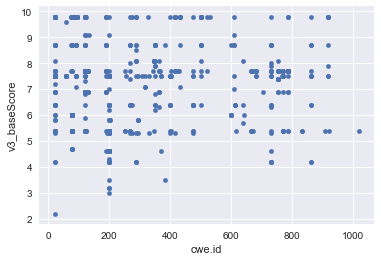

In [130]:
# YOUR CODE

tem_1_df = df[(df["cwe.id"] != 0) & (df["v3_baseScore"] != 0)].loc[1200:2400,["cwe.id","v3_baseScore"]] # sample df from 1200 to 2400

tem_1_df.plot.scatter(x = "cwe.id",y="v3_baseScore")

tem_1_df["cwe.id"].corr(tem_1_df["v3_baseScore"])

### Q4.2: The CVSSv2 and CVSSv3 scoring systems are different, and their changes are well documented. Is there an implicit relationship between the two Base Score features despite their differences in calculation?
**Note:** Implicit is defined as "capable of being understood from something else though unexpressed" ([reference](https://www.merriam-webster.com/dictionary/implicit))

<span style= 'float: right;'><b>[5 marks]</b></span>

0.72275071197515

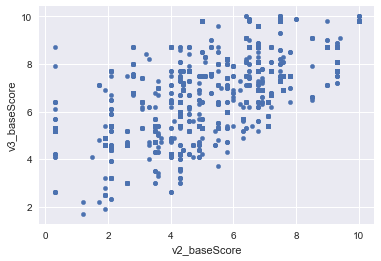

In [131]:
# YOUR CODE HERE
tem_2_df = df[(df["v2_baseScore"] != 0) & (df["v3_baseScore"] != 0)].loc[:,["v2_baseScore","v3_baseScore"]] # sample df from 1200 to 2400

tem_2_df.plot.scatter(x = "v2_baseScore",y="v3_baseScore")


tem_2_df.loc[0:20,["v2_baseScore","v3_baseScore"]]
tem_2_df["v2_baseScore"].corr(tem_2_df["v3_baseScore"])

### Q4.3: Assess the following statement: "The entries with User Interaction Required have a lower CVSS Base Score."
**Hint:** A Hypothesis Test is a good way to assess a statement.

<span style= 'float: right;'><b>[15 marks]</b></span>

In [145]:
# YOUR CODE HERE
requried_Score = (df[df["v3_userInteraction"] == 0.62])["v3_baseScore"]
none_Score = (df[df["v3_userInteraction"] == 0.85])["v3_baseScore"]

t,p = stats.ttest_ind(requried_Score, none_Score)
print(p< 0.05)


True


### Q4.4: This dataset is full of subtleties. Find an implicit relationship (not covered above) between two (or move) columns in the dataset and discuss how it could be used to better understand the two (or more) columns in the relationship.
**Note:** Implicit is defined as "capable of being understood from something else though unexpressed" ([reference](https://www.merriam-webster.com/dictionary/implicit))

<span style= 'float: right;'><b>[10 marks]</b></span>

In [ ]:
# YOUR CODE HERE

*****
## Q5: Linear Regression
While the equation to generate the CVSS scoring systems (v2 or v3) have been well defined (as you would have implemented above), it stands to reason that it would be possible to generate these results using a different equation, or less variables.

Your task is as follows:
- Using a Linear Regression model, show how it could be possible (or impossible) to predict a CVSS score based on the variables provided in the dataset.

You are able to choose any variables in the dataset, except of course the base scores themselves. This means you can try to use CVSSv2 indicators to predict a CVSSv3 score, or vice versa. After running your experiment, provide a written answer highlighting your results and the outcome of your work.

Marks will be provided for the quality of your response, and the evidence used to prove or disprove whether a CVSS score can be generated without using the above equation.

<span style= 'float: right;'><b>[10 marks]</b></span>

In [ ]:
# YOUR CODE HERE

*****
## Q6: New Data From Old

<br>
Sometimes, the data you have available is not fit for purpose to meet your ultimate end goals. There are specific instances where this data is important, one of which is outlined below.

### The Task
Your task is as follows:
- Develop a basic heuristic using the CVSS metrics available to categorise the dataset entries based on their threat to the context/s below. Consider items (such as Attack Complexity) when developing this system. Run your heuristic over the dataset, and add the output to each row on the dataset, under the column name `Threat Classification`.
- Justify your use of variables in the written section below and explain how this might be an effective solution to stopping attacks.

There are two items you will be marked against:
1. A solution based on a real world example that this is inspired from. Your solution will be considered as to how well it satisfies and extends upon the context below.
2. Your rationale and justification for your heuristic.

In addition to your code solution, please supply a free-form text explanation of your heuristic. Inspiration from this can be drawn from the CVSS specification schemes referenced above.

Note that COMP2420 Students and COMP6420 Students are supplied with different contexts. COMP6420 students are expected to show greater insight and deeper understanding when developing and applying their heuristic. This includes making assumptions of the type and importance of information being secured and protected in this classification system.

### COMP2420 Context
Consider a situation where you are a security team with limited funds, required to patch multiple security products based on their CVEs. You are only able to patch _n_ vulnerabilities due to budget limitations, and therefore need a way to prioritise which vulnerabilities need patching. While the CVSS systems provide a good general system for determining the threat level of a vulnerability, you are more concerned with weaknesses that can be exploited over a **network**, and require minimal user interaction.

### COMP6420 Context
Consider a situation where a government agency is assessing the quality of products and patching products for use in secure environments. Your team is small and resources are limited, and therefore you will not be able to patch every issue available. You want to develop a triage<sup>*</sup> system for assessing vulnerabilities to advise organisations of the threats they may face based on the relative danger of having unpatched vulnerabilities in their environments, and determine the most severe vulnerabilities which will need patching by your team when advising organisations. Your team is mainly focused upon network attacks that require minimal user interaction, although you assume that the complexity of carrying out a specific exploit is not important due to the skills of your adversaries. Your team is not familiar with the CVSS system, and has a basic understanding of what the CVE system is, and therefore you need to account for this in your explanation and development of the system.

<sup>*</sup>For this content, a triage is defined as
> The assigning of priority order to projects on the basis of where funds and other resources can be best used, are most needed, or are most likely to achieve success ([Merriam-Webster Dictionary](https://www.merriam-webster.com/dictionary/triage))

<span style= 'float: right;'><b>[COMP6420: 20 marks]</b></span>
<span style= 'float: right;'><b>[COMP2420: 15 marks]</b></span>

In [ ]:
# YOUR CODE HERE